# Performance

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

In [4]:
from sklearn.externals import joblib

In [5]:
scalerpath = '../gabbar/trained/scaler.pkl'
modelpath = '../gabbar/trained/model.pkl'

scaler = joblib.load(scalerpath)
model = joblib.load(modelpath)

In [6]:
changesets = pd.read_csv('../features.csv')
print('Shape: {}'.format(changesets.shape))
changesets.head()

Shape: (141, 57)


,changeset_id,harmful,features_created,features_modified,features_deleted,user_id,user_name,user_first_edit,user_changesets,user_features,...,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
0,48074088,True,0,1,0,5721683,PearOhDees,2017-04-23T22:35:38.000Z,28,95,...,0,0,0,0,0,0,0,0,0,0
1,48074415,False,10,0,11,5721809,cmap26,2017-04-23T23:10:04.000Z,10,88,...,0,0,0,0,0,0,0,0,0,0
2,48074116,True,5,0,0,5721683,PearOhDees,2017-04-23T22:35:38.000Z,28,95,...,0,0,0,0,0,0,0,0,0,0
3,48074323,False,11,0,0,5721809,cmap26,2017-04-23T23:10:04.000Z,10,88,...,0,0,0,0,0,0,0,0,0,0
4,48073232,True,0,1,0,5721501,Mark Cornett,2017-04-23T21:34:56.000Z,6,39,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print('Labelled harmful: {}'.format(changesets[changesets['harmful'] == True].shape[0]))
print('Labelled not harmful: {}'.format(changesets[changesets['harmful'] == False].shape[0]))

Labelled harmful: 22
Labelled not harmful: 119


In [8]:
non_training_features = np.array(['changeset_id', 'harmful', 'user_first_edit', 'user_id', 'user_name', 'changeset_editor'])

features = changesets.columns.values
features = np.setdiff1d(features, non_training_features)
print('Total features: {}\n'.format(len(features)))

Total features: 51



In [9]:
changesets['prediction'] = model.predict(scaler.transform(changesets[features]))

print('Predicted harmful: {}'.format(changesets[changesets['prediction'] == True].shape[0]))
print('Predicted not harmful: {}'.format(changesets[changesets['prediction'] == False].shape[0]))

Predicted harmful: 66
Predicted not harmful: 75


In [10]:
booleans = [True, False]
columns = ['Labelled', 'Predicted', 'Number of changesets']
results = []
for actual in booleans:
    for prediction in booleans:
        temp = changesets[(changesets['harmful'] == actual) & (changesets['prediction'] == prediction)]
        results.append([actual, prediction, temp.shape[0]])
pd.DataFrame(results, columns=columns)

,Labelled,Predicted,Number of changesets
0,True,True,10
1,True,False,12
2,False,True,56
3,False,False,63


## Average

In [11]:
performances = pd.read_csv('../performance.csv')
performances

,Date,Labelled harmful + Predicted harmful,Labelled harmful + Predicted not harmful,Labelled not harmful + Predicted harmful,Labelled not harmful + Predicted not harmful,Harmful hit rate,Not harmful hit rate
0,2017-04-17,28,16,96,195,22.580645,92.417062
1,2017-04-18,27,19,63,198,30.000000,91.244240
2,2017-04-19,23,37,111,336,17.164179,90.080429
3,2017-04-20,29,25,80,253,26.605505,91.007194
4,2017-04-21,19,13,62,224,23.456790,94.514768
5,2017-04-22,12,15,60,98,16.666667,86.725664
6,2017-04-23,10,12,56,63,15.151515,84.000000


In [12]:
performances.mean()

Labelled harmful + Predicted harmful             21.142857
Labelled harmful + Predicted not harmful         19.571429
Labelled not harmful + Predicted harmful         75.428571
Labelled not harmful + Predicted not harmful    195.285714
Harmful hit rate                                 21.660757
Not harmful hit rate                             89.998479
dtype: float64

(0, 100)

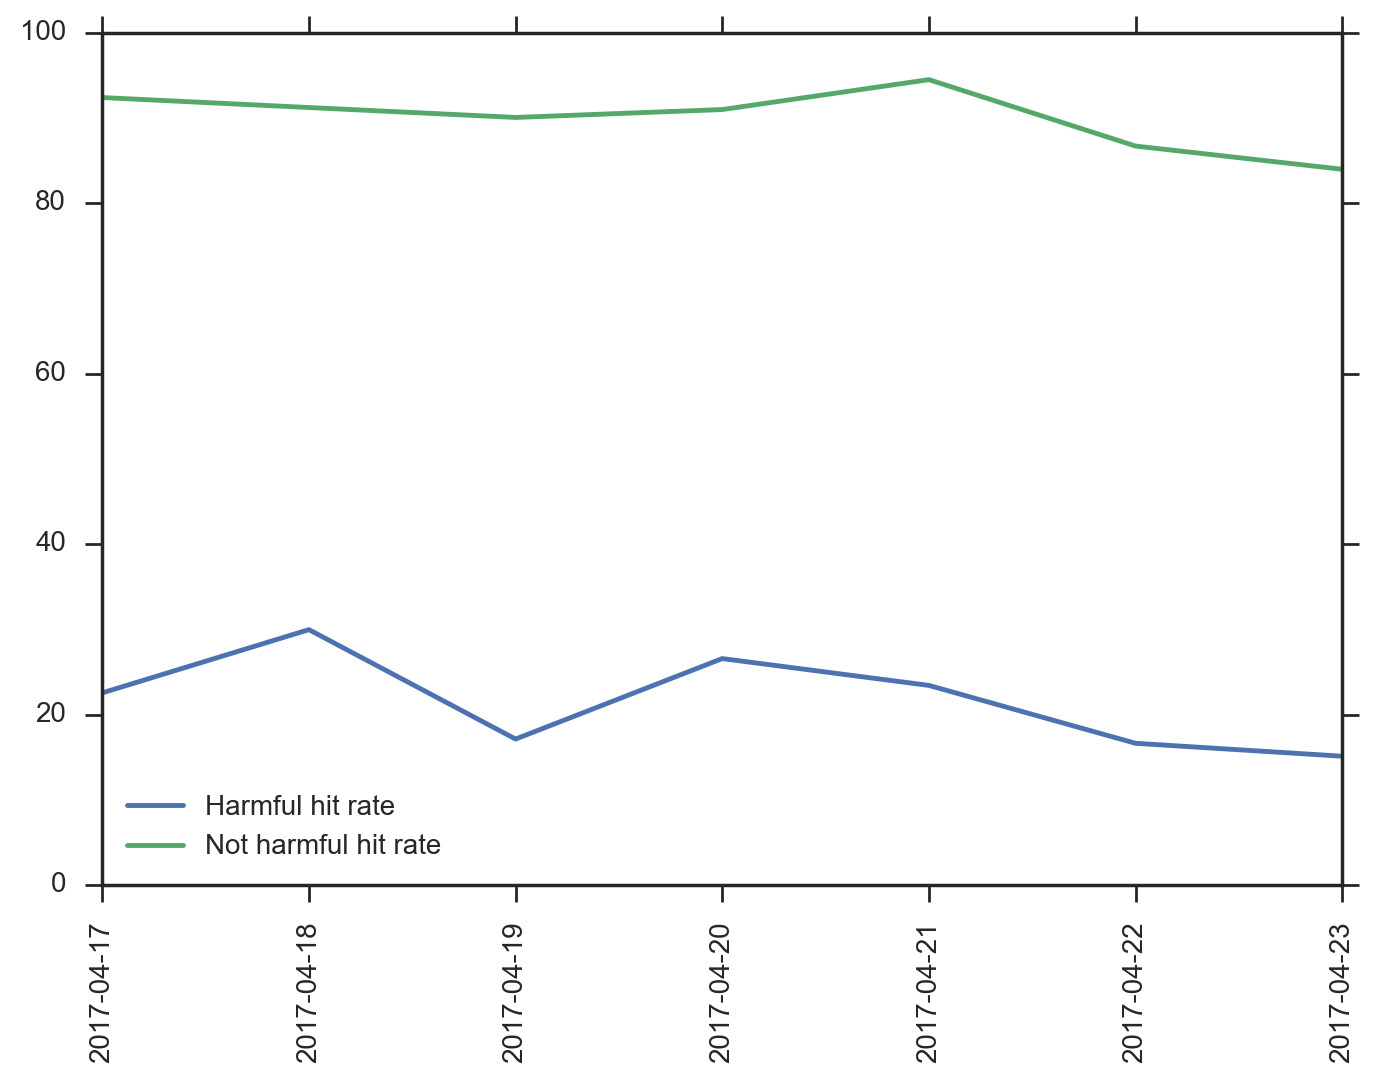

In [13]:
ax = performances[['Date', 'Harmful hit rate', 'Not harmful hit rate']].plot()
ax.set_xticklabels(performances['Date'], rotation=90);
ax.set_ylim([0, 100])

In [14]:
details_columns = [
    'Date',
    'Labelled harmful + Predicted harmful',
    'Labelled harmful + Predicted not harmful',
    'Labelled not harmful + Predicted harmful',
    'Labelled not harmful + Predicted not harmful'
]

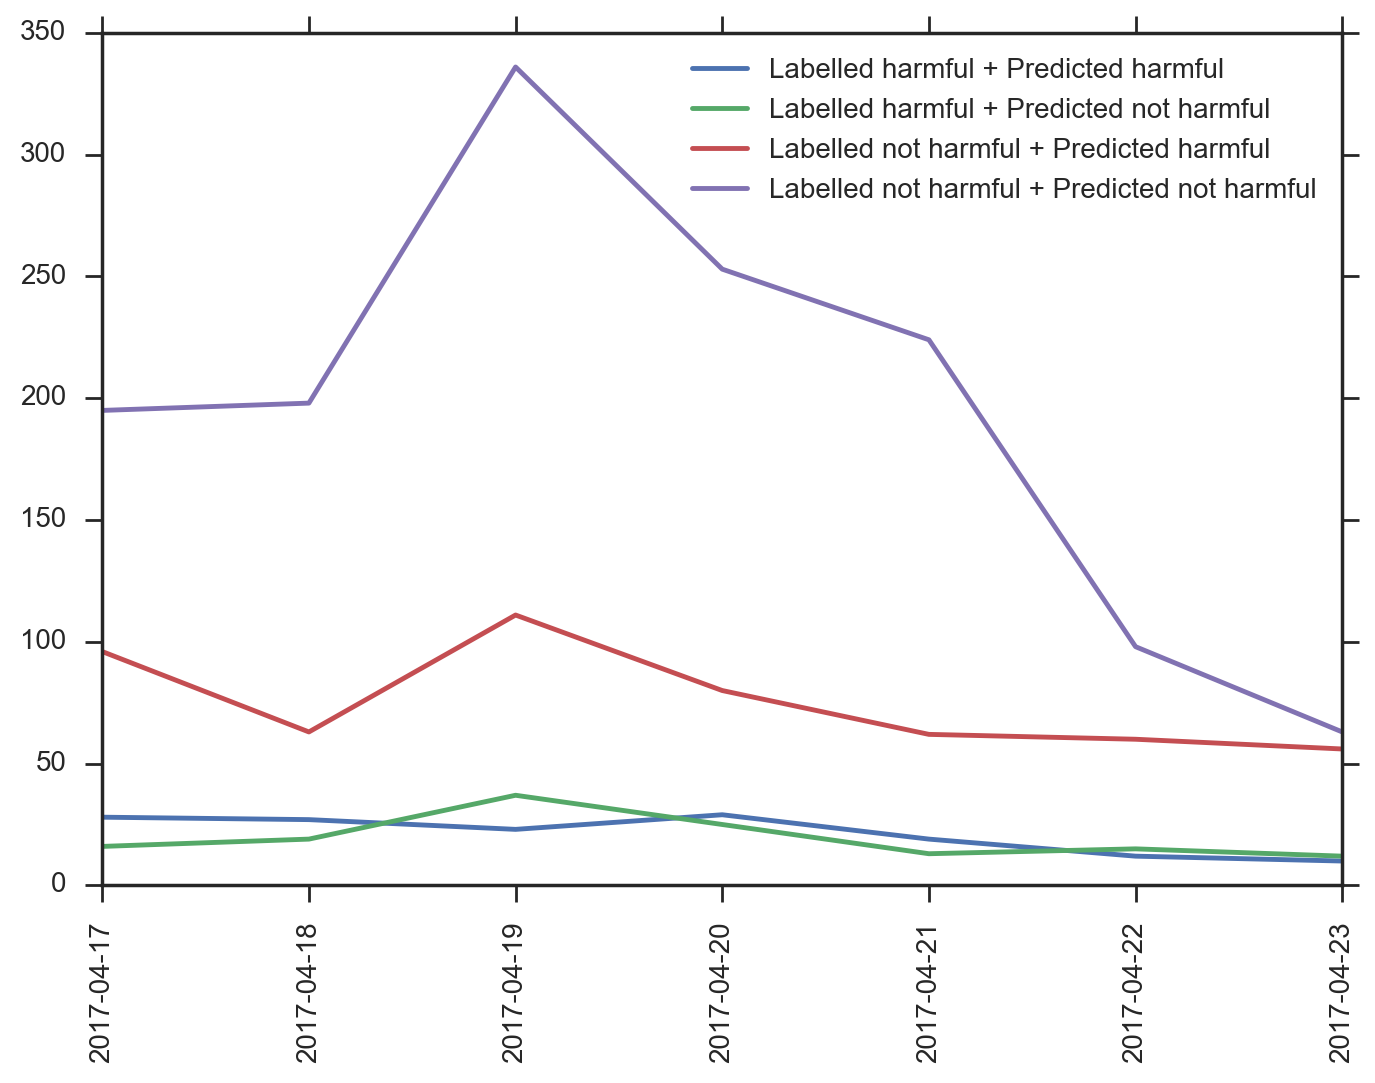

In [15]:
ax = performances[details_columns].plot()
ax.set_xticklabels(performances['Date'], rotation=90);